#Kütüphanelerimi Yükledim.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
blackFriday=pd.read_csv("test.csv")

 Keşifsel Veri Analizi (EDA - Exploratory Data Analysis) 

In [10]:
blackFriday.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [12]:
blackFriday.shape

(233599, 11)

#data frame özelliklerime bakıyorum . (SATIR SÜTÜN SAYISI)

In [16]:
blackFriday.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3'],
      dtype='object')

In [18]:
blackFriday.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2             72344
Product_Category_3            162562
dtype: int64

#NaN değerlerime bakıyorum.

In [22]:
blackFriday.nunique()

User_ID                       5891
Product_ID                    3491
Gender                           2
Age                              7
Occupation                      21
City_Category                    3
Stay_In_Current_City_Years       5
Marital_Status                   2
Product_Category_1              18
Product_Category_2              17
Product_Category_3              15
dtype: int64

In [24]:
data=blackFriday.copy()

In [26]:
data.shape

(233599, 11)

In [28]:
data=data.dropna()

Veri Temizleme ve Ön İşleme 
#eksik verileri temizliyorum.

In [32]:
data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0
5,1000013,P00350442,M,46-50,1,C,3,1,2,3.0,15.0
6,1000013,P00155442,M,46-50,1,C,3,1,1,11.0,15.0
7,1000013,P0094542,M,46-50,1,C,3,1,2,4.0,9.0
8,1000015,P00161842,M,26-35,7,A,1,0,10,13.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...
233584,1006023,P00262242,M,26-35,0,C,2,1,1,11.0,16.0
233586,1006026,P00110742,M,36-45,6,C,1,1,1,2.0,8.0
233588,1006030,P00129842,M,26-35,17,C,1,1,6,8.0,15.0
233591,1006033,P00127642,M,51-55,13,B,1,1,1,2.0,15.0


In [34]:
data.shape

(71037, 11)

 İstatistiksel Analizler & Görselleştirme

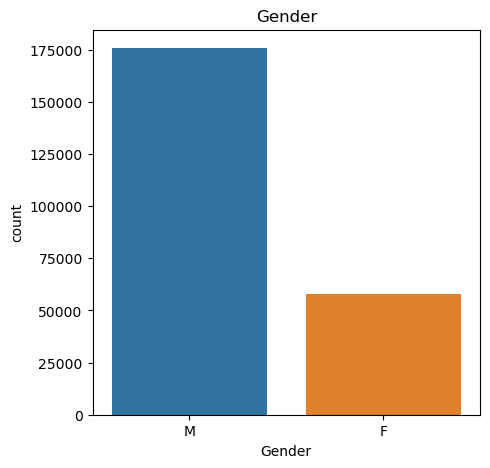

In [50]:
sns.countplot(x="Gender", data=blackFriday)
fig = plt.gcf()
fig.set_size_inches(5, 5)
plt.title("Gender")
plt.show()

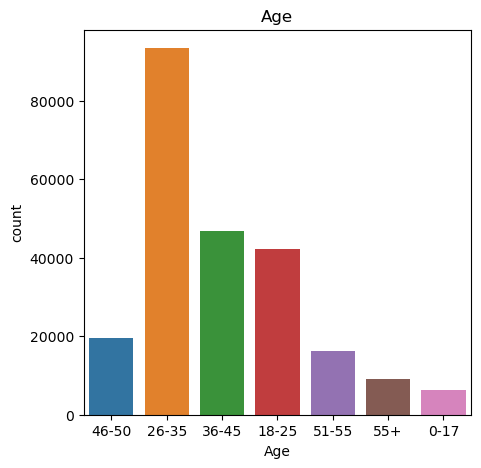

In [52]:
sns.countplot(x="Age", data=blackFriday)
fig = plt.gcf()
fig.set_size_inches(5, 5)
plt.title("Age")
plt.show()

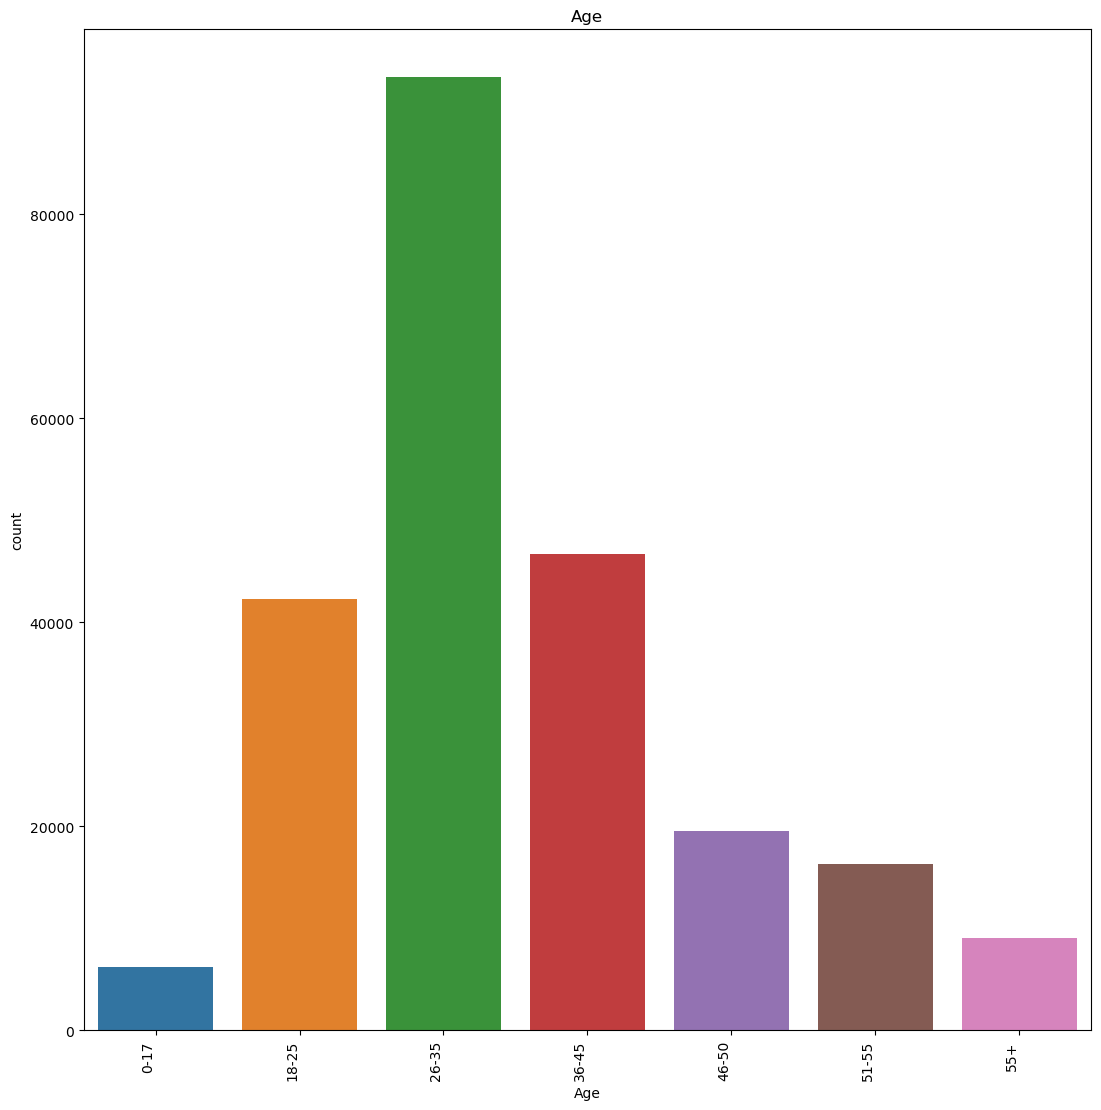

In [60]:
# Yaşları sıralı hale getirme
sorted_ages = blackFriday["Age"].value_counts().index.sort_values()

# Countplot ile yaşları sıraya göre yazdırma
ax = sns.countplot(x="Age", data=blackFriday, order=sorted_ages)

# X-tik etiketlerini döndür ve hizala
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")

# Grafik boyutunu ayarla
fig = plt.gcf()
fig.set_size_inches(13, 13)

# Grafiği göster
plt.title("Age")
plt.show()

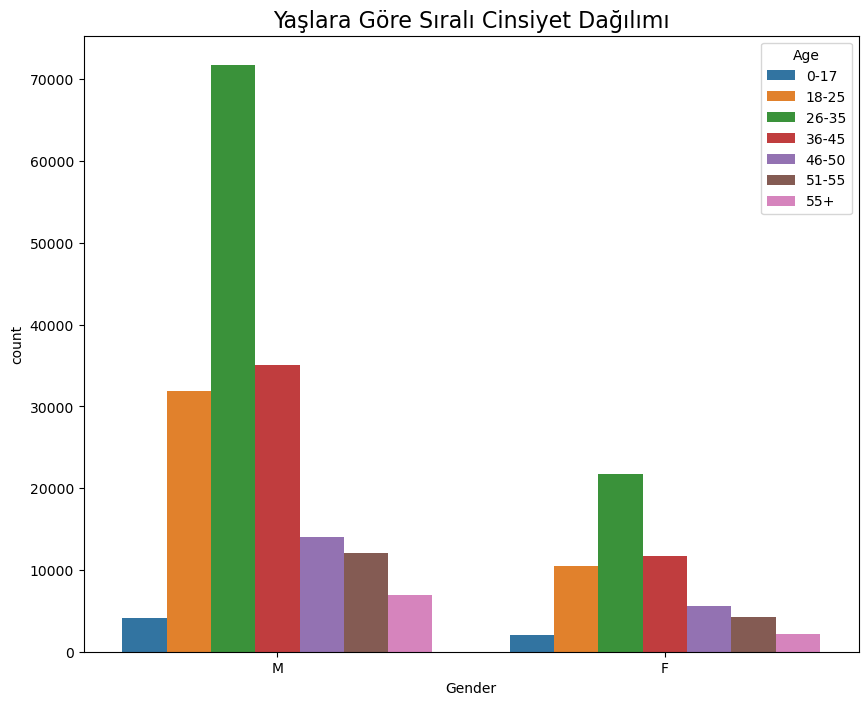

In [66]:
sorted_ages = ["0-17", "18-25", "26-35", "36-45", "46-50", "51-55", "55+"]

# Grafik oluşturma
plt.figure(figsize=(10, 8))
sns.countplot(x="Gender", hue="Age", data=blackFriday, hue_order=sorted_ages)

# Başlık ekleme
plt.title("Yaşlara Göre Sıralı Cinsiyet Dağılımı", fontsize=16)

# Grafiği gösterme
plt.show()

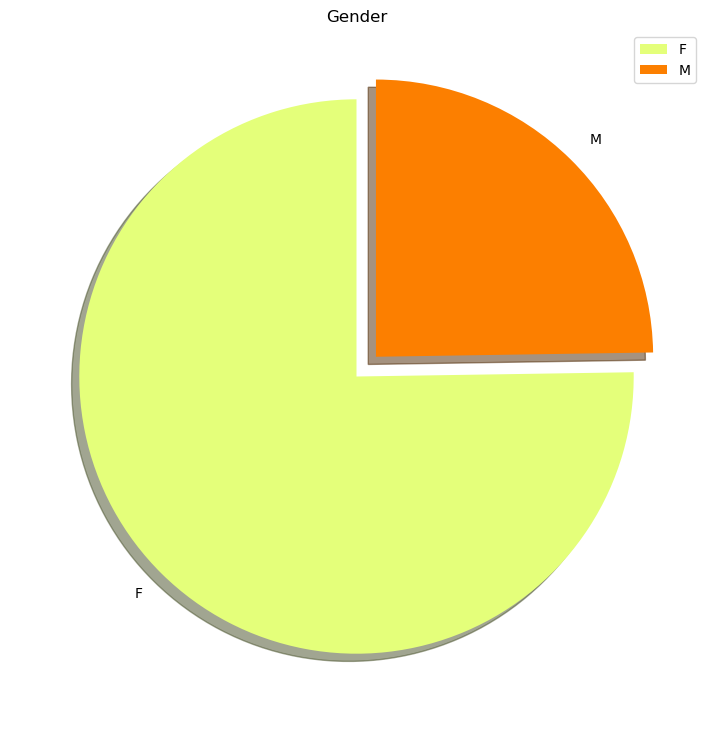

In [76]:
labels=["F","M"]
size=blackFriday["Gender"].value_counts()
colors=plt.cm.Wistia(np.linspace(0,1,2))
explode=[0,0.1]
plt.rcParams["figure.figsize"]=(9,9)
plt.pie(size,labels=labels,colors=colors,explode=explode,shadow=True,startangle=90)
plt.title("Gender")
plt.legend()
plt.show()

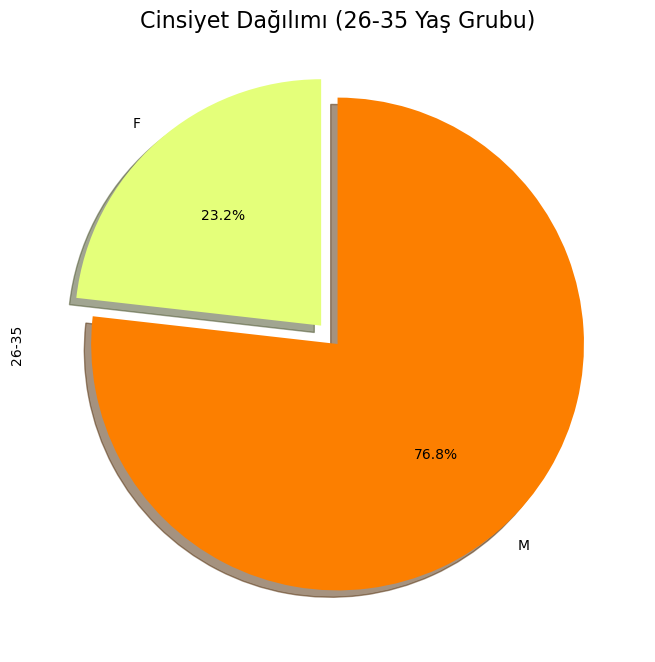

In [92]:
# Renkleri ve dilim ayrımını ayarla
colors = plt.cm.Wistia(np.linspace(0, 1, len(grouped_data.columns)))  # Cinsiyet sayısına göre renk seçimi
explode = [0.1 if label == "F" else 0 for label in grouped_data.columns]  # Kadın ('F') için ayrım

# Yaş aralıklarından birini seçerek grafik oluşturma (örnek: "26-35")
age_group = "26-35" 

# Seçilen yaş grubuna göre cinsiyet oranlarını dilimleme
grouped_data.loc[age_group].plot.pie(
    autopct="%1.1f%%",
    shadow=True,
    figsize=(10, 8),
    labels=grouped_data.columns,
    colors=colors,  # Renkler
    explode=explode,  # Dilim ayrımı
    startangle=90  # Başlangıç açısı
)

# Başlık ekleme
plt.title(f"Cinsiyet Dağılımı ({age_group} Yaş Grubu)", fontsize=16)

# Grafiği gösterme
plt.show()


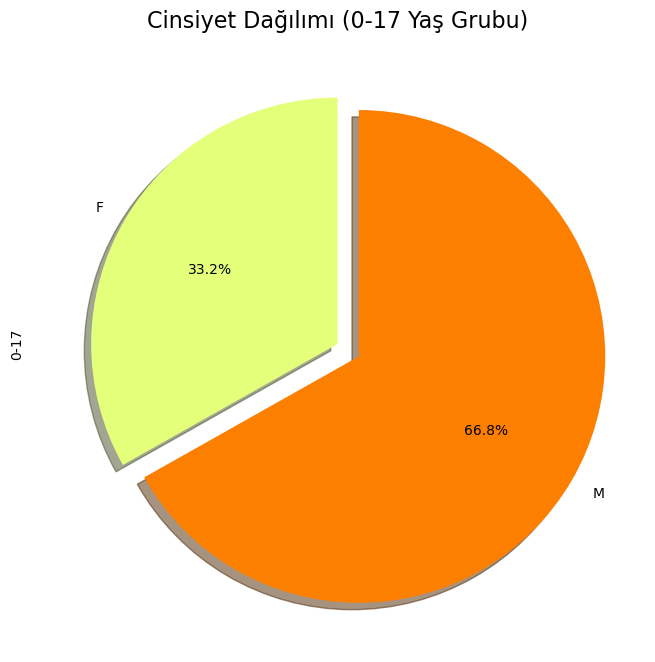

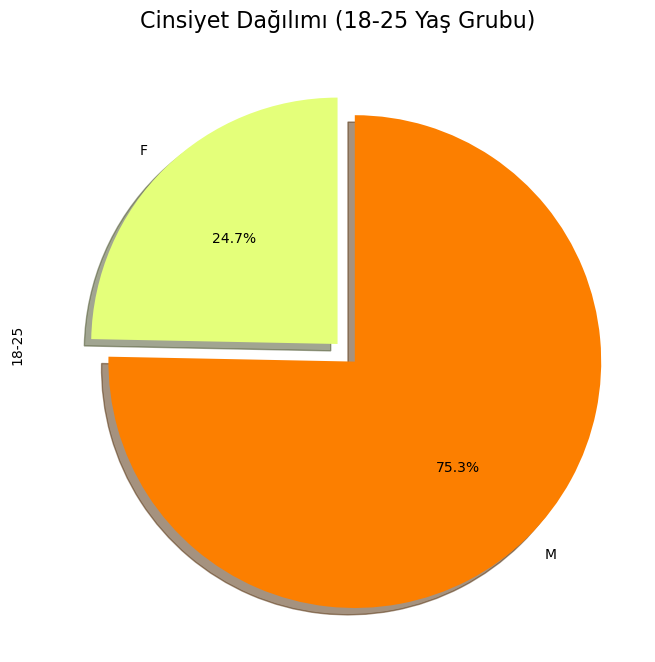

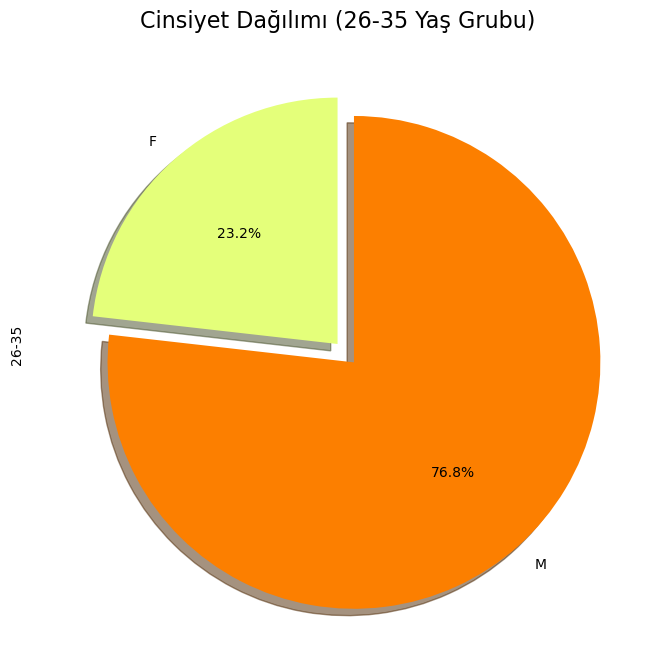

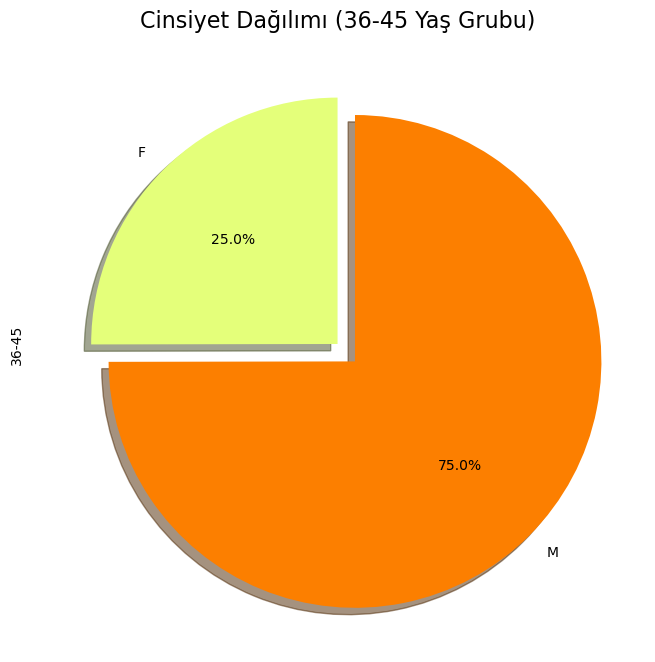

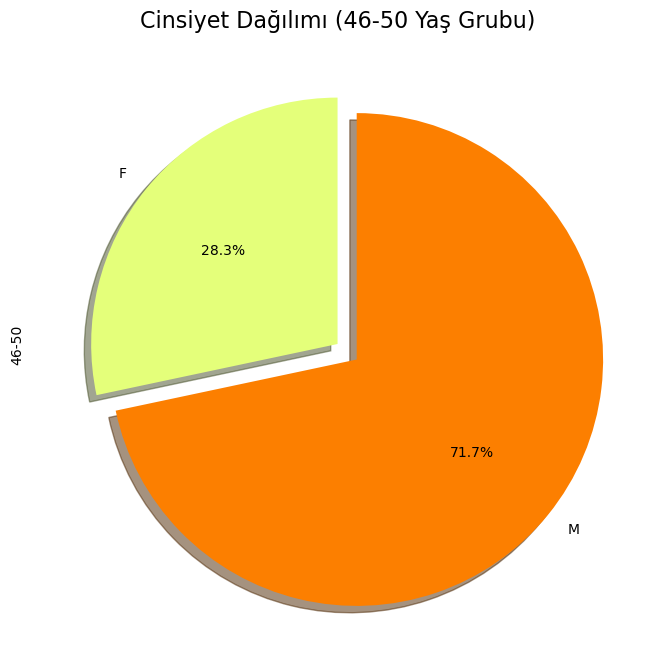

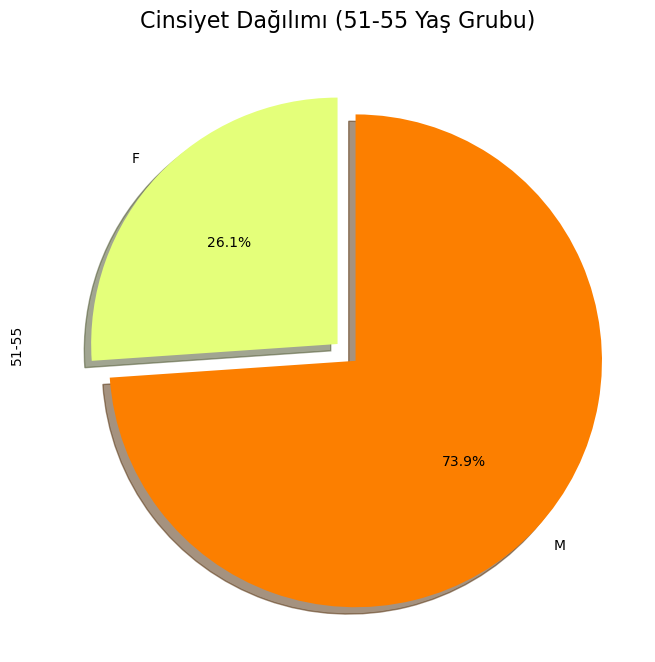

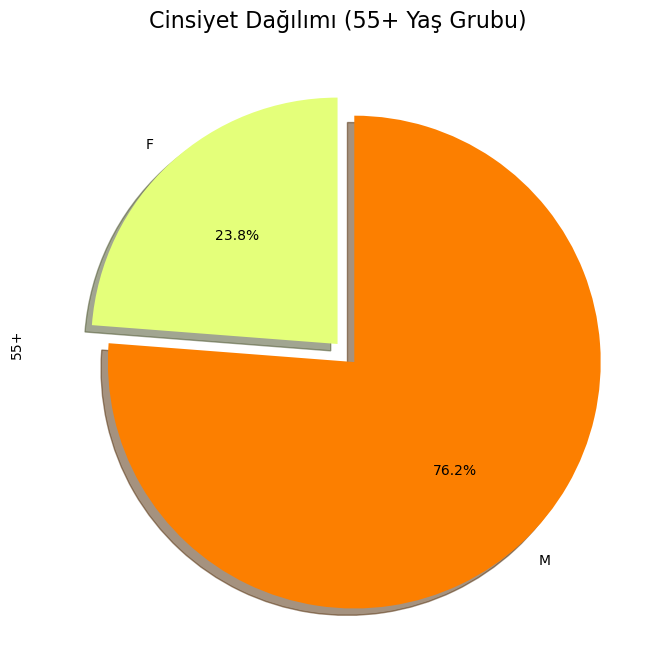

In [90]:
# Renkleri ve dilim ayrımını ayarla
colors = plt.cm.Wistia(np.linspace(0, 1, 2))  # İki cinsiyet için renk seçimi
explode = [0, 0.1]  # Kadın (örnek olarak ikinci dilim) için ayrım

# Yaş gruplarına göre pie grafikleri oluşturma
for age_group in grouped_data.index:
    plt.figure(figsize=(10, 8))  # Grafik boyutunu ayarla
    grouped_data.loc[age_group].plot.pie(
        autopct="%1.1f%%",
        shadow=True,
        labels=grouped_data.columns,  # Cinsiyet etiketleri
        colors=colors,  # Renkler
        explode=explode,  # Dilim ayrımı
        startangle=90  # Başlangıç açısı
    )
    plt.title(f"Cinsiyet Dağılımı ({age_group} Yaş Grubu)", fontsize=16)  # Başlık
    plt.show()


In [108]:
from wordcloud import WordCloud


In [105]:
pip install wordCloud

Note: you may need to restart the kernel to use updated packages.


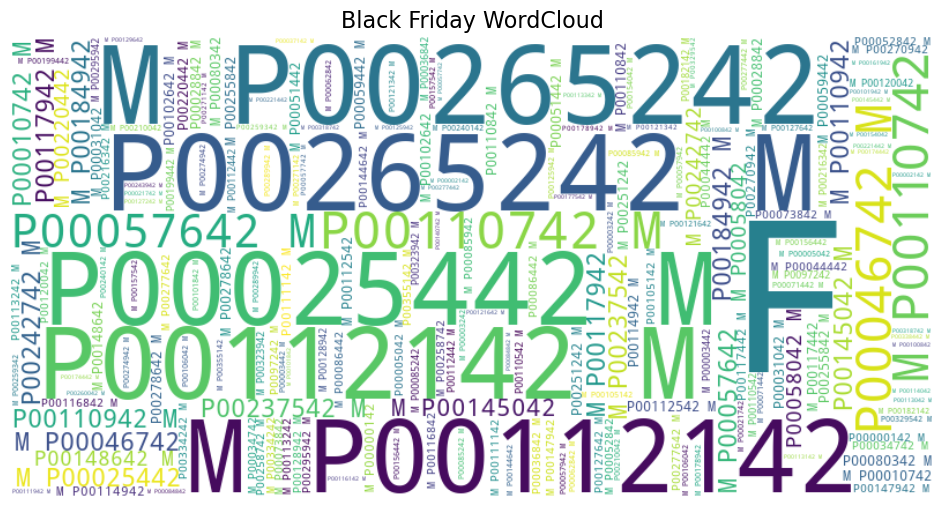

In [118]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Örnek olarak "Product_ID" sütunundan kelime bulutu oluşturalım
text = " ".join(blackFriday["Product_ID"].astype(str)+ " " +blackFriday["Gender"].astype(str) + " " + blackFriday["Age"].astype(str))

# WordCloud 
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color="white",
    colormap="viridis",
    max_words=200,
    contour_width=1,
    contour_color="steelblue"
).generate(text)

# WordCloud görselleştirme
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Black Friday WordCloud", fontsize=16)
plt.show()



In [126]:
# Sadece numeric sütunlar
numeric_columns = blackFriday.select_dtypes(include=["number"])

# Sayısal sütunlardaki eksik değerleri medyanla dolduralım
blackFriday[numeric_columns.columns] = numeric_columns.fillna(numeric_columns.median())


In [130]:
# Eksik değer oranını kontrol 
missing_ratio = blackFriday.isnull().mean() * 100
print("Eksik veri oranları:\n", missing_ratio[missing_ratio > 0])

# Sayısal olmayan sütunları kontrol 
non_numeric_columns = blackFriday.select_dtypes(exclude=["number"]).columns
print("Sayısal olmayan sütunlar:\n", non_numeric_columns)


Eksik veri oranları:
 Series([], dtype: float64)
Sayısal olmayan sütunlar:
 Index(['Product_ID', 'Gender', 'Age', 'City_Category',
       'Stay_In_Current_City_Years'],
      dtype='object')


In [134]:
# Sayısal sütunlardaki eksik değerleri median ile doldur
numeric_columns = blackFriday.select_dtypes(include=["number"]).columns
blackFriday[numeric_columns] = blackFriday[numeric_columns].fillna(blackFriday[numeric_columns].median())

# Kategorik sütunlardaki eksik değerleri 'Unknown' ile doldur
categorical_columns = blackFriday.select_dtypes(include=["object"]).columns
blackFriday[categorical_columns] = blackFriday[categorical_columns].fillna("Unknown")

# Eksik verilerin tamamen doldurulduğunu kontrol et
print(blackFriday.isnull().sum())


User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
dtype: int64


#Feature Selection

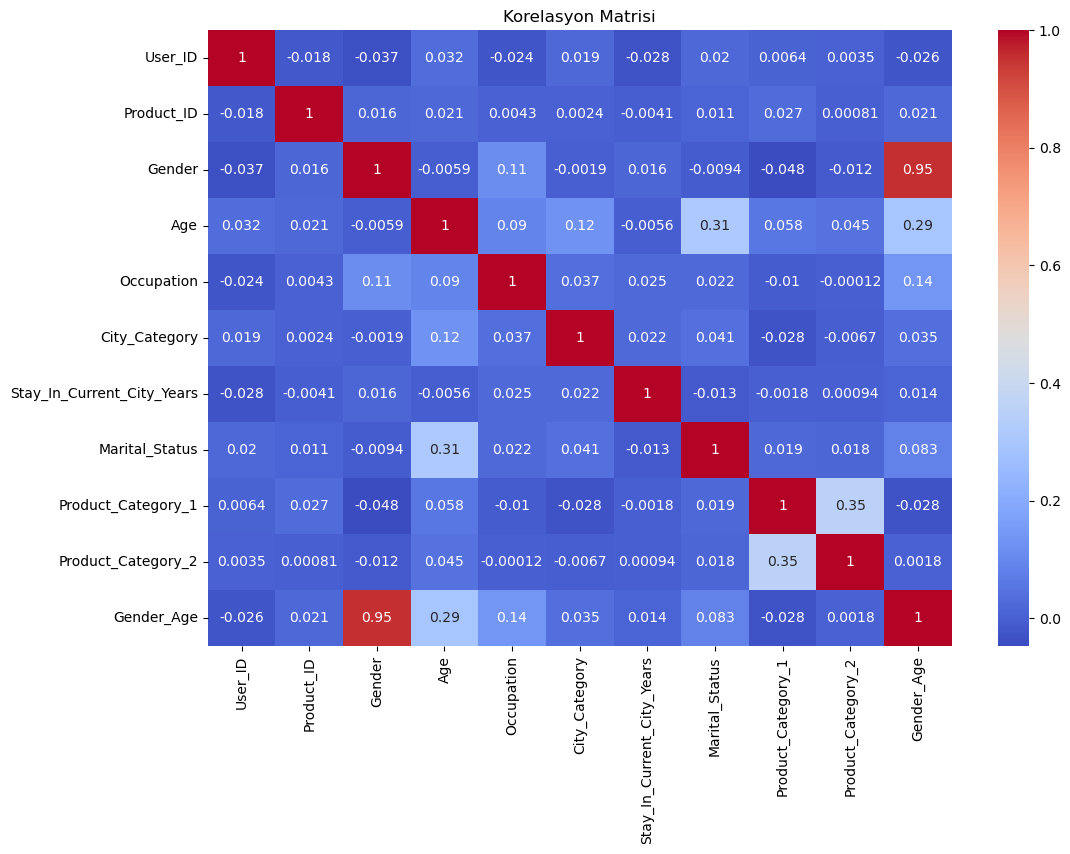

Yüksek korelasyona sahip sütunlar: ['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1', 'Product_Category_2', 'Gender_Age']


In [150]:
correlation_matrix = blackFriday.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Korelasyon Matrisi")
plt.show()

high_corr_features = [col for col in correlation_matrix.columns if any(correlation_matrix[col] > 0.9)]
print("Yüksek korelasyona sahip sütunlar:", high_corr_features)


Black Friday veri seti üzerinde çalıştım, bu veri seti genellikle tüketici davranışları, alışveriş tercihleri ve satış tahminleri üzerine odaklandı. Bu tür bir model, e-ticaret firmalarına şu alanlarda yardımcı olabilir:
    E-Ticaret Sektöründe Kullanım: Black Friday dönemindeki tüketici davranışlarını inceleyen bir model, firmaların hangi ürünlerin daha fazla talep göreceğini, belirli yaş gruplarının ve cinsiyetlerin hangi ürünlere daha fazla ilgi gösterdiğini tahmin etmelerine yardımcı olabilir. Bu, stok yönetimini optimize etmeye, pazarlama stratejilerini kişiselleştirmeye ve gelir artışı sağlamaya yardımcı olur.
    Yaş grubu, cinsiyet ve alışveriş tutarı gibi özellikler, tüketici segmentasyonu ve kişiselleştirilmiş pazarlama kampanyaları oluşturmak için kullanılabilir.